## What is Linear Regression?
 
Linear regression is a fundamental statistical method used to model the relationship between a dependent variable ( y ) and an independent variable ( x ) by fitting a linear equation to observed data. In simple linear regression, this relationship is defined by the equation of a straight line:

$$
y = wx + b
$$

( y ): Dependent variable (target output)
( x ): Independent variable (input feature)
( w ): Weight (slope of the line)
( b ): Bias (y-intercept of the line)

The objective is to find the optimal values of ( w ) and ( b ) that minimize the difference between the predicted values ( \hat{y} ) and the actual values ( y ).
Loss Function
 
To measure how well the linear model fits the data, we use a loss function. A commonly used loss function for linear regression is the Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}{n} (y_i - \hat{y}_i)2
$$

( n ): Number of data points
( y_i ): Actual value
( \hat{y}_i ): Predicted value from the model

The goal is to minimize the MSE by adjusting ( w ) and ( b ).
Gradient Descent
 
Gradient descent is an optimization algorithm used to find the values of ( w ) and ( b ) that minimize the loss function. It involves calculating the gradients (partial derivatives) of the loss with respect to the parameters and updating the parameters in the opposite direction of the gradients.

The update rules are:

$$
w_{\text{new}} = w_{\text{old}} - \alpha \frac{\partial \text{MSE}}{\partial w}
$$

$$
b_{\text{new}} = b_{\text{old}} - \alpha \frac{\partial \text{MSE}}{\partial b}
$$

( \alpha ): Learning rate (controls the step size of each update)
( \frac{\partial \text{MSE}}{\partial w} ), ( \frac{\partial \text{MSE}}{\partial b} ): Gradients of the loss function with respect to ( w ) and ( b )
Linear Regression in PyTorch
 
PyTorch is an open-source machine learning library that accelerates the path from research prototyping to production deployment. It provides efficient tensor computations and automatic differentiation, which are essential for training machine learning models.

Implementing Linear Regression with PyTorch

In [1]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create a column matrix of X values
We can create tensors right away rather than convert from NumPy arrays.

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)

# Equivalent to
# X = torch.unsqueeze(torch.linspace(1,50,50), dim=1)

In [3]:
torch.linspace(1,50,50).reshape(-1,5,5).shape


torch.Size([2, 5, 5])

In [4]:
print(X[:10])
print(X.shape)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])
torch.Size([50, 1])


## Create a "random" array of error values
We want 50 random integer values that collectively cancel each other out.

In [5]:
torch.manual_seed(42) # to obtain reproducible results
e = torch.randint(-9,9,(50,1),dtype=torch.float)
print(e.sum())
e.shape

tensor(-39.)


torch.Size([50, 1])

In [6]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


## Plot

Text(0.5, 0, 'X')

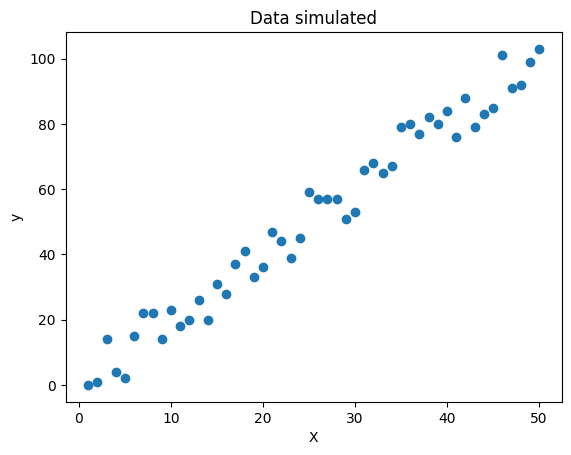

In [7]:
plt.scatter(X,y)
plt.title('Data simulated')
plt.ylabel('y')
plt.xlabel('X')

Simple linear model
As a quick demonstration we'll show how the built-in nn.Linear() model preselects weight and bias values at random.

In [8]:
torch.manual_seed(37)
model = nn.Linear(in_features=1, out_features=1)

print(f'Model weight W {model.weight.item()}')
print(f'Model Bias b   {model.bias.item()}')

Model weight W 0.5822619199752808
Model Bias b   0.28373467922210693


In [9]:
model

Linear(in_features=1, out_features=1, bias=True)

This are randum W and b that are probably very wrong. 

Lets build a simpla single Neuron Network model

In [10]:
class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [31]:
torch.manual_seed(37)
model = Model() # it is hard coded for 1,1
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.5822619199752808
Bias:   0.28373467922210693


## Itterate over model parameters
Here its only one neuron...

In [12]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.6182646751403809
linear.bias 	 -0.6681829690933228


lets run a single scalar tensor through the model

In [13]:
x = torch.tensor([2.])
x

tensor([2.])

In [14]:
print(f'for input {x.item()} the model predicts {model.forward(x)[0]}')
print(f'which is {model.linear.weight.item()} x {x} + {model.linear.bias.item()} = {model.forward(x).item()}')

for input 2.0 the model predicts 0.568346381187439
which is 0.6182646751403809 x tensor([2.]) + -0.6681829690933228 = 0.568346381187439


## Plot the initial model
We can plot the untrained model against our dataset to get an idea of our starting point.

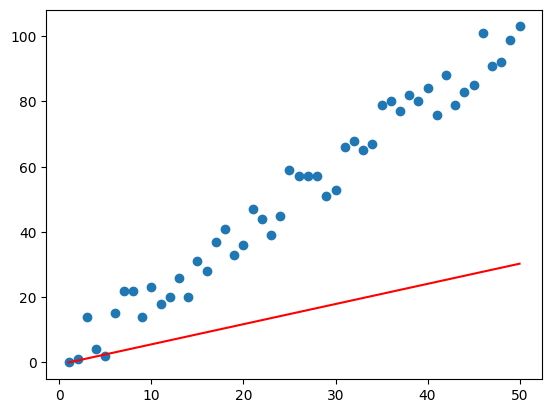

In [20]:
y_real = 2*X + 1 + e
plt.scatter(X.numpy(), y_real.numpy())
y = model.forward(X)
y = y.detach() # this detaches the gradients

#plt.plot(X.numpy(), model.linear.weight.item()*X + model.linear.bias.item())
y
plt.plot(X.numpy(), y.numpy(), 'r')
# plt.title('Data simulated')
# plt.ylabel('y')
# plt.xlabel('X')

### lets train this model

In [32]:
# define a loss function
criterion = nn.MSELoss()

## setting an optimizer SGD Stohastic gradient decent. 
Stochastic Gradient Descent (SGD) is an optimization algorithm used in machine learning and deep learning to minimize the error of a model by adjusting its parameters iteratively. Unlike standard gradient descent, which computes gradients using the entire dataset, SGD updates the model's parameters based on the gradient of the loss function with respect to a single data point (or a small batch) at each iteration. This makes SGD computationally efficient and well-suited for large datasets. However, it introduces noise in the updates, leading to a more stochastic path toward convergence, which can help escape local minima but may also result in less precise convergence compared to full-batch gradient descent.

In [80]:
torch.manual_seed(37)
model = Model() # it is hard coded for 1,1
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.5822619199752808
Bias:   0.28373467922210693


In [81]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001) # default lr=0.001

In [82]:
# epochs are the number of runs over the data batches. 

In [83]:
epochs = 50 # probably way to much for this simple problem

In [84]:
losses = [] # this is for tracking the losses alonf the epochs

In [85]:
model.linear.weight.item()

0.5822619199752808

In [112]:
# lets do everything in a single cell. 
torch.manual_seed(42) # to obtain reproducible results

class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters()) # lr=0.001 default

X = torch.arange(0,50,1).view(-1, 1).float()
e = torch.randint(-9,9,(50,1),dtype=torch.float)
y = 2*X + 1 + e

epochs = 50
losses = []

for i in range(epochs):
    i += 1 # just to count from 1 and not 0
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    print(f'epoch {i}:\tloss {loss}\t whights:{model.linear.weight.item()} {model.linear.bias.item()}')
    
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()


epoch 1:	loss 1245.9044189453125	 whights:0.7645385265350342 0.8300079107284546
epoch 2:	loss 492.51312255859375	 whights:2.750969409942627 0.8897255063056946
epoch 3:	loss 204.32261657714844	 whights:1.522415280342102 0.8519885540008545
epoch 4:	loss 94.08265686035156	 whights:2.2822823524475098 0.8745262026786804
epoch 5:	loss 51.91303634643555	 whights:1.8123400211334229 0.8597853183746338
epoch 6:	loss 35.781986236572266	 whights:2.1030166149139404 0.8681010603904724
epoch 7:	loss 29.6113338470459	 whights:1.9232617616653442 0.8621570467948914
epoch 8:	loss 27.25075912475586	 whights:2.034461736679077 0.8650329113006592
epoch 9:	loss 26.347631454467773	 whights:1.9657104015350342 0.8624542355537415
epoch 10:	loss 26.002016067504883	 whights:2.008256435394287 0.8632495403289795
epoch 11:	loss 25.86965560913086	 whights:1.981966495513916 0.8619585037231445
epoch 12:	loss 25.81888198852539	 whights:1.9982506036758423 0.8619582056999207
epoch 13:	loss 25.799299240112305	 whights:1.9882

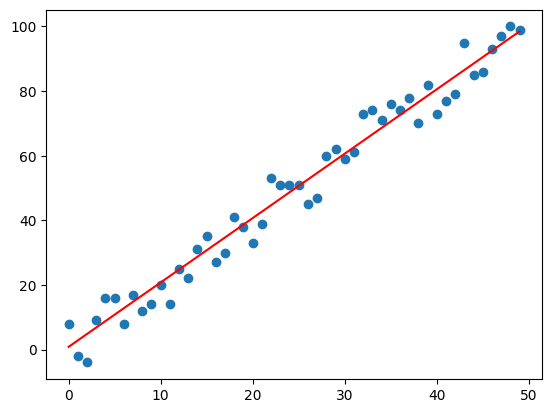

In [113]:
plt.scatter(X.numpy(), y.numpy())
y = model.forward(X)
y = y.detach() # this detaches the gradients

#plt.plot(X.numpy(), model.linear.weight.item()*X + model.linear.bias.item())
plt.plot(X.numpy(), y.numpy(), 'r')

Text(0.5, 0, 'epochs')

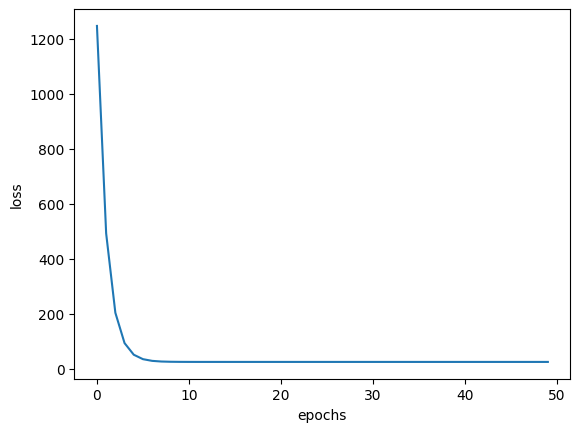

In [117]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')